In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load modules and data

In [28]:
import os
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
import scipy.stats as stats

import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist


from src.data_handler import load_data


In [29]:
all_data = load_data()

== Load Data: start ==
== Load Data: end ==


In [30]:
words = list(set(all_data["word1"].unique()).union(set(all_data["word2"].unique())))
words.sort()
words

['Art gallery',
 'Autobiography book',
 'Baking cookies',
 'Board games',
 'Book club',
 'Bread making',
 'Brunch',
 'Chat online',
 'Cinema',
 'Clothes shopping',
 'Clubbing',
 'Comedy podcast',
 'Computer programming',
 'Concert',
 'Creative writing',
 'Current affairs podcast',
 'DIY',
 'Dinner party',
 'Documentary series',
 'Fantasy fiction audiobook',
 'Farmers market',
 'Frisbee',
 'Gardening',
 'Hiking',
 'Historical tour',
 'History book',
 'Home decorating',
 'Indoor rock climbing',
 'Karaoke',
 'Knitting',
 'Lift weights',
 'Local restaurant',
 'Meal prepping',
 'Museum',
 'Musical',
 'Netflix',
 'News articles',
 'Online chess',
 'Painting',
 'Play football',
 'Poker',
 'Pottery workshop',
 'Practice an instrument',
 'Pub or bar',
 'Reading a novel',
 'Reality TV',
 'RomCom film',
 'Running outside',
 'Salsa class',
 'Sci-fi film',
 'Science non-fiction book',
 'Spin class',
 'Sports video games',
 'Spotify playlist',
 'Stand up comedy night',
 'Theater show',
 'Trivia nigh

# Main

In [31]:
sentence_model_names = ["all-MiniLM-L6-v2","all-mpnet-base-v2"]

model_used = sentence_model_names[1]
model = SentenceTransformer(model_used)

In [32]:
def create_embeddings(text:str, model:any)->np.ndarray:
    return model.encode(text)


def get_word_to_embeddings(words:list[str],model:any) -> pd.DataFrame:
    word_to_embeddings = {}
    for word in words:
        word_to_embeddings[word] = create_embeddings(word,model)
    return pd.DataFrame(word_to_embeddings)

def get_cosine_similarity(word_to_embeddings:pd.DataFrame) -> pd.DataFrame:
    
    return


In [33]:
word_to_embeddings = get_word_to_embeddings(words,model)
word_to_embeddings

,Art gallery,Autobiography book,Baking cookies,Board games,Book club,Bread making,Brunch,Chat online,Cinema,Clothes shopping,...,Science non-fiction book,Spin class,Sports video games,Spotify playlist,Stand up comedy night,Theater show,Trivia night,True crime TV series,Walk in the park,YouTube videos
0,0.000441,0.020321,-0.020057,0.007999,0.002294,-0.011104,-0.075563,0.010652,-0.008659,0.012313,...,0.009056,-0.044112,-0.056991,0.001361,-0.001788,-0.029465,0.014876,0.037559,-0.009760,-0.004024
1,0.045686,0.102725,-0.024937,-0.031160,0.031765,-0.068007,-0.030074,-0.025831,0.031551,0.011559,...,0.000556,0.003495,-0.016453,-0.035871,0.035412,-0.003836,-0.015835,0.037163,0.043572,0.023029
2,-0.022454,-0.002505,-0.007034,-0.049151,0.006674,-0.026462,-0.005008,-0.001276,0.003838,-0.003021,...,0.025813,0.024716,-0.041171,-0.030161,0.012084,-0.007466,0.026789,0.022725,0.000901,0.019776
3,0.011243,-0.029869,0.013753,0.021141,-0.021081,-0.002147,-0.048156,-0.022553,-0.040574,0.007096,...,-0.034126,0.049716,0.014541,-0.011522,-0.033125,0.036850,-0.009766,-0.011547,-0.015778,-0.030209
4,-0.040381,-0.043690,-0.034387,-0.023805,-0.001275,-0.041257,-0.061852,-0.032978,-0.005970,0.027096,...,-0.027805,0.037900,0.026531,0.042019,-0.003717,-0.021979,-0.027301,-0.070911,-0.028107,0.012786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,-0.071475,-0.005522,-0.011470,0.008280,-0.000616,-0.064646,0.041061,0.053122,-0.008299,0.043185,...,0.036495,0.073921,-0.021071,-0.006017,0.008455,0.004161,-0.026414,-0.068769,0.055951,-0.017056
764,-0.017353,-0.048217,-0.004639,-0.007991,-0.033453,-0.007899,-0.029645,0.002682,0.015221,-0.009982,...,-0.020007,-0.033269,0.027047,0.021769,-0.022030,-0.032322,-0.012814,-0.025039,-0.059551,-0.009973
765,0.025245,-0.013924,-0.012408,0.028306,0.032427,-0.027998,0.005302,0.035315,0.036678,0.024726,...,0.055781,0.019996,0.017567,0.017137,-0.003025,0.009310,0.046144,0.020725,0.031398,0.005532
766,-0.009092,0.008886,-0.029330,0.001636,-0.020977,-0.051137,-0.007852,-0.007571,-0.018555,-0.021302,...,-0.003627,-0.052674,-0.001494,0.014288,0.053107,0.034416,-0.000699,-0.004815,0.004075,0.023214


[7.4580915e-02 5.7355214e-02 5.3118736e-02 4.3924186e-02 4.3143377e-02
 4.1079767e-02 4.0638011e-02 3.5250992e-02 3.0601656e-02 2.9469661e-02
 2.7056647e-02 2.6137598e-02 2.4347074e-02 2.2715436e-02 2.1938823e-02
 2.0833306e-02 2.0334337e-02 1.9696949e-02 1.9461699e-02 1.6835371e-02
 1.6566887e-02 1.6217288e-02 1.5877971e-02 1.5758388e-02 1.3851919e-02
 1.3236530e-02 1.2846585e-02 1.2584948e-02 1.1982826e-02 1.1693859e-02
 1.1224615e-02 1.0692429e-02 1.0188690e-02 1.0019756e-02 9.5917024e-03
 9.3989512e-03 9.0084663e-03 8.5197771e-03 8.1043616e-03 8.0891559e-03
 7.7185947e-03 7.1669295e-03 7.0409337e-03 6.9567151e-03 6.7604715e-03
 5.9831040e-03 5.5046729e-03 5.4110344e-03 5.1418659e-03 4.9456339e-03
 4.6507092e-03 4.6000765e-03 4.1502058e-03 3.9820522e-03 3.6582460e-03
 3.5340202e-03 3.2109013e-03 3.0437249e-03 2.5651858e-03 4.5405290e-15]


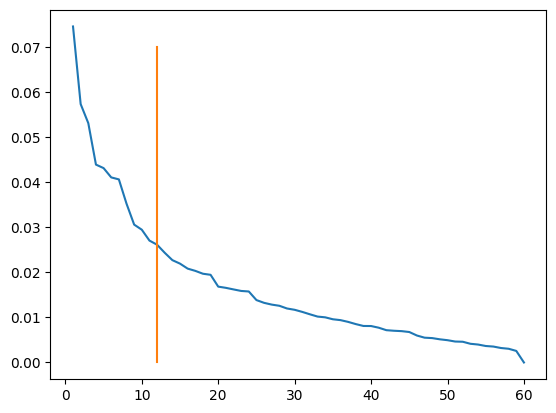

In [34]:
n_components = min(len(word_to_embeddings),len(word_to_embeddings.columns))
pca = PCA(n_components=n_components, svd_solver='full')
pca.fit(word_to_embeddings.values.T)
print(pca.explained_variance_ratio_)
plt.plot(np.arange(1,n_components+1),pca.explained_variance_ratio_)
plt.plot(12*np.ones(2),[0,0.07])

In [35]:
pca = PCA(n_components=50, svd_solver='full')
pca.fit(word_to_embeddings.values.T)
new_word_to_embeddings = pca.transform(word_to_embeddings.values.T).T
word_to_embeddings = pd.DataFrame(new_word_to_embeddings,columns=word_to_embeddings.columns)
word_to_embeddings

,Art gallery,Autobiography book,Baking cookies,Board games,Book club,Bread making,Brunch,Chat online,Cinema,Clothes shopping,...,Science non-fiction book,Spin class,Sports video games,Spotify playlist,Stand up comedy night,Theater show,Trivia night,True crime TV series,Walk in the park,YouTube videos
0,-0.118707,0.381906,-0.317545,-0.131808,0.121207,-0.220795,-0.147649,-0.113283,0.182746,-0.219911,...,0.433808,-0.093194,-0.049962,0.069094,0.181267,0.223316,0.026705,0.457225,-0.119981,0.073807
1,0.380292,0.243829,0.257124,-0.226365,0.024719,0.319222,-0.035257,-0.115853,-0.029838,0.155143,...,0.162977,-0.081151,-0.456087,-0.180678,0.007964,-0.044584,-0.052467,-0.046035,-0.243966,-0.111176
2,-0.263428,0.294707,0.209322,0.036619,-0.014860,0.278837,-0.067101,0.038801,-0.234645,0.030754,...,0.467761,0.207559,0.134930,-0.041132,-0.339499,-0.464253,-0.203725,0.007875,-0.038039,-0.072401
3,-0.146998,0.286996,0.052239,0.084607,0.343251,0.019182,0.351012,0.177470,-0.346713,-0.046654,...,0.133698,0.006441,-0.073524,0.132308,0.151740,-0.038947,0.171135,-0.243978,0.013473,-0.338337
4,-0.029352,-0.081477,0.248901,-0.128357,-0.171357,0.214279,-0.012057,-0.061796,0.085683,-0.261598,...,0.047141,0.230078,-0.119941,0.164389,-0.013624,0.193183,-0.162641,-0.052920,-0.183387,-0.107830
5,0.307815,0.185778,-0.264542,0.206125,0.072088,-0.315986,-0.249667,0.008920,0.062195,-0.018292,...,0.106649,-0.209258,0.104381,-0.007342,-0.241515,0.106350,0.024243,-0.215098,0.091696,-0.116784
6,-0.065216,-0.018114,-0.069190,-0.272265,-0.038936,-0.117860,0.009082,-0.332258,0.074651,-0.011910,...,0.222412,0.186920,-0.312307,-0.001423,0.071547,0.132406,0.110537,-0.008279,0.263651,-0.272659
7,-0.001154,-0.089113,-0.097760,0.225188,0.160498,-0.168942,0.103292,0.192754,0.320160,0.119190,...,0.132461,0.053320,0.146233,-0.215434,-0.016506,-0.002346,-0.018927,-0.011543,-0.134469,-0.097474
8,0.155949,0.091218,-0.224921,-0.094839,0.044226,-0.046608,-0.096344,0.026446,0.013796,0.075820,...,0.062070,0.205497,0.077448,0.195764,-0.104213,0.014606,-0.200190,0.044444,-0.187185,0.148796
9,0.088216,0.064476,-0.249666,-0.237493,0.299548,-0.296370,-0.081151,0.154880,-0.038021,0.041248,...,-0.039007,0.504833,-0.187430,0.026562,0.134132,-0.071690,-0.029311,-0.022469,0.045155,0.001851


In [36]:
cos_similarity = 1-cdist(word_to_embeddings.values.T,word_to_embeddings.values.T,metric="cosine")
cos_similarity = pd.DataFrame(cos_similarity,columns = word_to_embeddings.columns, index = word_to_embeddings.columns)
cos_similarity

,Art gallery,Autobiography book,Baking cookies,Board games,Book club,Bread making,Brunch,Chat online,Cinema,Clothes shopping,...,Science non-fiction book,Spin class,Sports video games,Spotify playlist,Stand up comedy night,Theater show,Trivia night,True crime TV series,Walk in the park,YouTube videos
Art gallery,1.000000,0.059131,-0.099359,-0.060732,-0.001983,-0.113944,-0.119940,-0.067097,0.113242,0.069589,...,-0.129426,-0.106422,-0.198917,-0.112503,0.015146,0.116560,-0.108221,-0.091390,-0.067253,-0.069482
Autobiography book,0.059131,1.000000,-0.055526,-0.114914,0.213721,-0.041459,-0.080177,-0.029393,-0.128217,-0.090940,...,0.390142,-0.049039,-0.117755,-0.016115,0.037815,-0.171814,-0.054857,0.048007,-0.100603,-0.076934
Baking cookies,-0.099359,-0.055526,1.000000,-0.026266,-0.137452,0.482595,0.069098,-0.022491,-0.160546,0.030197,...,-0.042500,0.005162,-0.110652,-0.055636,-0.087033,-0.199844,-0.026260,-0.085383,-0.068856,-0.024973
Board games,-0.060732,-0.114914,-0.026266,1.000000,0.144362,-0.036530,0.061828,0.077517,-0.037524,0.003337,...,-0.083082,-0.156445,0.540132,-0.116790,-0.148164,-0.089151,0.042168,-0.166632,0.006329,0.024366
Book club,-0.001983,0.213721,-0.137452,0.144362,1.000000,-0.168549,0.078146,0.152518,-0.039470,-0.055043,...,0.090527,0.015063,-0.050904,0.002968,0.077240,0.012447,0.102279,-0.110310,-0.020632,-0.095990
Bread making,-0.113944,-0.041459,0.482595,-0.036530,-0.168549,1.000000,0.059393,-0.022164,-0.121875,-0.009683,...,0.000871,0.027728,-0.121638,-0.049801,-0.077859,-0.198132,-0.121425,-0.125231,-0.129269,-0.056778
Brunch,-0.119940,-0.080177,0.069098,0.061828,0.078146,0.059393,1.000000,0.090349,-0.170632,-0.085173,...,-0.113006,-0.020165,-0.078959,0.013317,0.072913,-0.177831,0.110263,-0.095285,-0.017578,-0.211709
Chat online,-0.067097,-0.029393,-0.022491,0.077517,0.152518,-0.022164,0.090349,1.000000,-0.070534,0.081730,...,-0.099992,-0.039639,0.085713,-0.040632,-0.082459,-0.139296,-0.092670,-0.127140,0.026043,0.034136
Cinema,0.113242,-0.128217,-0.160546,-0.037524,-0.039470,-0.121875,-0.170632,-0.070534,1.000000,-0.060420,...,-0.108388,-0.075288,0.014356,-0.063652,-0.005434,0.326059,-0.069560,-0.024480,-0.029001,0.175186
Clothes shopping,0.069589,-0.090940,0.030197,0.003337,-0.055043,-0.009683,-0.085173,0.081730,-0.060420,1.000000,...,-0.044165,-0.034009,-0.024955,-0.009474,-0.085892,-0.055859,-0.102374,-0.098778,-0.046790,-0.004350


In [37]:
extracted_data = all_data[["participant","depressionCont","word_pair","word1","word2","rated_similarity"]].dropna().reset_index(drop=True)
extracted_data

,participant,depressionCont,word_pair,word1,word2,rated_similarity
0,1,12,Art gallery. Book club.,Art gallery,Book club,52.0
1,1,12,Art gallery. Sci-fi film.,Art gallery,Sci-fi film,0.0
2,1,12,Art gallery. Sports video games.,Art gallery,Sports video games,0.0
3,1,12,Art gallery. Stand up comedy night.,Art gallery,Stand up comedy night,69.0
4,1,12,Autobiography book. Cinema.,Autobiography book,Cinema,30.0
...,...,...,...,...,...,...
20155,112,6,Sci-fi film. YouTube videos.,Sci-fi film,YouTube videos,13.0
20156,112,6,Sports video games. Walk in the park.,Sports video games,Walk in the park,0.0
20157,112,6,Sports video games. YouTube videos.,Sports video games,YouTube videos,26.0
20158,112,6,Spotify playlist. True crime TV series.,Spotify playlist,True crime TV series,0.0


In [38]:
# check_no_reverse_word_pair
extracted_data["word_pair"].unique()
reverse_word_pair =  extracted_data.apply(lambda row: row["word2"]+". "+row["word1"]+".",axis=1)
print("No reverse word_pair? (True = is ok):",len(set(reverse_word_pair.unique()).union(extracted_data["word_pair"].unique())) == 2 * len(extracted_data["word_pair"].unique()))

# check all participants receive same word_pairs

print("Same word_pairs for everyone? (True = is ok):",(extracted_data["word_pair"].value_counts() == len(all_data["participant"].unique())).all())

No reverse word_pair? (True = is ok): True
Same word_pairs for everyone? (True = is ok): True


In [39]:
extracted_data[model_used] = np.diag(cos_similarity.loc[extracted_data["word1"],extracted_data["word2"]].values)
extracted_data

,participant,depressionCont,word_pair,word1,word2,rated_similarity,all-mpnet-base-v2
0,1,12,Art gallery. Book club.,Art gallery,Book club,52.0,-0.001983
1,1,12,Art gallery. Sci-fi film.,Art gallery,Sci-fi film,0.0,-0.126541
2,1,12,Art gallery. Sports video games.,Art gallery,Sports video games,0.0,-0.198917
3,1,12,Art gallery. Stand up comedy night.,Art gallery,Stand up comedy night,69.0,0.015146
4,1,12,Autobiography book. Cinema.,Autobiography book,Cinema,30.0,-0.128217
...,...,...,...,...,...,...,...
20155,112,6,Sci-fi film. YouTube videos.,Sci-fi film,YouTube videos,13.0,-0.025083
20156,112,6,Sports video games. Walk in the park.,Sports video games,Walk in the park,0.0,-0.072419
20157,112,6,Sports video games. YouTube videos.,Sports video games,YouTube videos,26.0,0.249169
20158,112,6,Spotify playlist. True crime TV series.,Spotify playlist,True crime TV series,0.0,-0.025995


In [40]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = extracted_data["rated_similarity"],
        y = extracted_data[model_used],
        mode = "markers"
    )
)
fig.show()

In [41]:
word_pair_to_info = {"participant_variance":[],"participant-model_covariance":[], "model_variance":[]}
for word_pair in extracted_data["word_pair"].unique():
    mask = extracted_data["word_pair"] == word_pair
    cov_matrix = np.cov(extracted_data[mask]["rated_similarity"]/100,extracted_data[mask][model_used])
    word_pair_to_info["participant_variance"].append(cov_matrix[0,0])
    word_pair_to_info["model_variance"].append(cov_matrix[1,1])
    word_pair_to_info["participant-model_covariance"].append(cov_matrix[0,1])
    print(np.corrcoef(extracted_data[mask]["rated_similarity"],extracted_data[mask][model_used]))
    break

word_pair_to_info


[[ 1. nan]
 [nan nan]]


/home/julien-rsbrg/venv/venv_semantic_to_liking/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning:

invalid value encountered in divide

/home/julien-rsbrg/venv/venv_semantic_to_liking/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning:

invalid value encountered in divide



{'participant_variance': [np.float64(0.08571348133848139)],
 'participant-model_covariance': [np.float64(0.0)],
 'model_variance': [np.float64(0.0)]}

In [42]:
np.corrcoef(extracted_data["rated_similarity"],extracted_data[model_used])

array([[1.       , 0.3549325],
       [0.3549325, 1.       ]])

## delta corr or inter class - LLM vs human

In [43]:
participant_rating_data = []

for participant in extracted_data["participant"].unique():
    mask = extracted_data["participant"] == participant
    subdata = extracted_data[mask][["word_pair","rated_similarity"]]
    subdata = subdata.rename(columns={"rated_similarity":f"participant_{participant}:rated_similarity"})
    participant_rating_data.append(subdata)

refactored_data = participant_rating_data[0]
for i in range(1,len(participant_rating_data)):
    refactored_data = pd.merge(refactored_data,participant_rating_data[i],how="outer",on="word_pair")


In [44]:
refactored_data = refactored_data.sort_values("word_pair").reset_index(drop=True)
refactored_data

,word_pair,participant_1:rated_similarity,participant_2:rated_similarity,participant_3:rated_similarity,participant_4:rated_similarity,participant_5:rated_similarity,participant_6:rated_similarity,participant_7:rated_similarity,participant_8:rated_similarity,participant_9:rated_similarity,...,participant_103:rated_similarity,participant_104:rated_similarity,participant_105:rated_similarity,participant_106:rated_similarity,participant_107:rated_similarity,participant_108:rated_similarity,participant_109:rated_similarity,participant_110:rated_similarity,participant_111:rated_similarity,participant_112:rated_similarity
0,Art gallery. Book club.,52.0,66.0,56.0,49.0,81.0,55.0,5.0,49.0,62.0,...,76.0,78.0,0.0,79.0,79.0,29.0,50.0,43.0,99.0,49.0
1,Art gallery. Sci-fi film.,0.0,26.0,60.0,19.0,66.0,3.0,8.0,1.0,51.0,...,54.0,50.0,2.0,33.0,46.0,50.0,34.0,41.0,22.0,0.0
2,Art gallery. Sports video games.,0.0,5.0,58.0,14.0,6.0,3.0,14.0,1.0,21.0,...,4.0,11.0,1.0,24.0,33.0,0.0,2.0,20.0,19.0,2.0
3,Art gallery. Stand up comedy night.,69.0,50.0,69.0,34.0,52.0,13.0,2.0,0.0,42.0,...,29.0,38.0,4.0,50.0,42.0,0.0,54.0,43.0,74.0,13.0
4,Autobiography book. Cinema.,30.0,50.0,49.0,36.0,77.0,40.0,37.0,0.0,33.0,...,25.0,76.0,1.0,79.0,34.0,81.0,50.0,63.0,50.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Sci-fi film. YouTube videos.,68.0,100.0,71.0,34.0,72.0,26.0,45.0,76.0,45.0,...,71.0,75.0,25.0,87.0,75.0,85.0,51.0,10.0,70.0,13.0
176,Sports video games. Walk in the park.,0.0,26.0,24.0,14.0,1.0,1.0,2.0,1.0,1.0,...,3.0,36.0,1.0,66.0,12.0,0.0,4.0,46.0,5.0,0.0
177,Sports video games. YouTube videos.,92.0,100.0,73.0,52.0,77.0,41.0,10.0,88.0,74.0,...,49.0,71.0,72.0,83.0,72.0,85.0,58.0,59.0,78.0,26.0
178,Spotify playlist. True crime TV series.,70.0,64.0,78.0,50.0,2.0,9.0,3.0,0.0,42.0,...,50.0,38.0,15.0,65.0,29.0,53.0,50.0,66.0,27.0,0.0


In [45]:
model_only_data = extracted_data[mask][["word_pair",model_used]].reset_index(drop=True)
model_only_data = model_only_data.sort_values("word_pair").reset_index(drop=True) # this ensures that both refactored_data and model_only_data have same order of word pairs
model_only_data

,word_pair,all-mpnet-base-v2
0,Art gallery. Book club.,-0.001983
1,Art gallery. Sci-fi film.,-0.126541
2,Art gallery. Sports video games.,-0.198917
3,Art gallery. Stand up comedy night.,0.015146
4,Autobiography book. Cinema.,-0.128217
...,...,...
175,Sci-fi film. YouTube videos.,-0.025083
176,Sports video games. Walk in the park.,-0.072419
177,Sports video games. YouTube videos.,0.249169
178,Spotify playlist. True crime TV series.,-0.025995


In [46]:
refactored_data = refactored_data.drop("word_pair",axis=1)
model_only_data = model_only_data.drop("word_pair",axis=1)

In [47]:
corr_between_participants = np.corrcoef(refactored_data.values.T)

text = np.round(corr_between_participants,3).astype(str)

participant_names = [c.split(":")[0] for c in refactored_data.columns]
for i in range(text.shape[0]):
    for j in range(text.shape[1]):
        text[i,j] = participant_names[i]+":"+participant_names[j]

fig = go.Figure(data=go.Heatmap(
                    z= np.tril(corr_between_participants,-1),
                    x = participant_names,
                    y = participant_names,
                    text=text)
)
fig.update
fig.show()

In [48]:
tril_indices = np.tril_indices(refactored_data.values.shape[1],-1) # k = -1 to remove the diagonal

distinct_corr_between_participants = corr_between_participants[tril_indices]
distinct_corr_between_participants

array([0.59207984, 0.54735802, 0.48502669, ..., 0.45986976, 0.42695198,
       0.44724919], shape=(6216,))

In [49]:
distinct_corr_model_participants = np.corrcoef(refactored_data.values.T,model_only_data.values.T)[-1][:-1] # [:-1] to remove the diagonal
distinct_corr_model_participants

array([0.55850012, 0.51103293, 0.41347245, 0.48425738, 0.26426905,
       0.43282281, 0.15383201, 0.41233293, 0.46955286, 0.56198937,
       0.33844588, 0.40065477, 0.47505901, 0.33758389, 0.41943765,
       0.21540453, 0.42873233, 0.58144943, 0.41687766, 0.30393078,
       0.37017015, 0.38199388, 0.44523232, 0.50595555, 0.41796235,
       0.41624449, 0.44048628, 0.42691736, 0.48582368, 0.41429121,
       0.50973829, 0.49681056, 0.20356556, 0.55267561, 0.39610273,
       0.42925363, 0.50373065, 0.56710989, 0.33153419, 0.49878195,
       0.44176364, 0.48081896, 0.27999599, 0.28728605, 0.49544178,
       0.34998983, 0.41810707, 0.45691772, 0.33155709, 0.45067403,
       0.45649559, 0.44529623, 0.49047565, 0.44730316, 0.26109327,
       0.41656533, 0.51833885, 0.38135675, 0.07932133, 0.4223378 ,
       0.42162908, 0.39647317, 0.51234902, 0.17472288, 0.38305579,
       0.42486138, 0.39461585, 0.38573378, 0.4608286 , 0.33079351,
       0.38108417, 0.3944797 , 0.55779381, 0.37981668, 0.44502

In [50]:
np.mean(distinct_corr_between_participants), np.mean(distinct_corr_model_participants)

(np.float64(0.4436770135015089), np.float64(0.40652318625557476))

In [51]:
# simple mean difference
np.mean(distinct_corr_between_participants) - np.mean(distinct_corr_model_participants)

np.float64(0.037153827245934135)

In [52]:
# cohen d
def compute_cohen_d_effect_size(v0:np.ndarray,v1:np.ndarray) -> float:
    mean0 = np.mean(v0)
    mean1 = np.mean(v1)
    std0 = np.std(v0)
    std1 = np.std(v1)
    n0 = v0.size
    n1 = v1.size
    pooled_std = np.sqrt(((n0-1)*std0**2 + (n1-1)*std1**2)/(n0+n1-2))
    return (mean1 - mean0)/pooled_std

compute_cohen_d_effect_size(distinct_corr_between_participants,distinct_corr_model_participants)

np.float64(-0.2560459714904631)

In [53]:
# adapted effect size, out of sample from v0

def compute_effect_size_from_v0(v0:np.ndarray,v1:np.ndarray) -> float:
    mean0 = np.mean(v0)
    mean1 = np.mean(v1)
    std0 = np.std(v0)
    return (mean1 - mean0)/std0

compute_effect_size_from_v0(distinct_corr_between_participants,distinct_corr_model_participants)

np.float64(-0.2549128762445331)

In [54]:
def get_distrib_corr_effect_size_from_rest(refactored_data:pd.DataFrame,raters:list[str] = None):
    distrib = {"rater":[],"effect_size":[]}

    if raters is None:
        raters = refactored_data.columns

    for rater in raters:
        rater_id = rater.split(":")[0]
        
        rater_ratings = refactored_data[rater]

        rest_data = refactored_data.copy()
        rest_data = rest_data.drop(rater,axis=1)

        corr_between_rest = np.corrcoef(rest_data.values.T)
        tril_indices = np.tril_indices(rest_data.values.shape[1],-1) # k = -1 to remove the diagonal
        distinct_corr_between_rest = corr_between_rest[tril_indices]

        distinct_corr_rater_to_rest = np.corrcoef(refactored_data.values.T,rater_ratings.values.T)[-1][:-1] # [:-1] to remove the diagonal

        
        distrib["rater"].append(rater_id)
        distrib["effect_size"].append(compute_effect_size_from_v0(distinct_corr_between_rest,distinct_corr_rater_to_rest))
    
    distrib = pd.DataFrame(distrib)
    return distrib

def plot_distrib(distrib):
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x = distrib["rater"],
            y = distrib["effect_size"],
            mode="markers"
        )
    )
    fig.show()

    fig = go.Figure()
    fig.add_trace(
        go.Histogram(
            x = distrib["effect_size"],
            nbinsx = 40
        )
    )
    fig.show()

    fig = go.Figure()

    fig.add_trace(
        go.Violin(
            x = distrib["effect_size"],
            side="positive",
            pointpos= -0.5,
            name = ""
        )
    )
    fig.update_traces(meanline_visible=True,
                    box_visible=True,
                    points='all', # show all points
                    jitter=0.1,  # add some jitter on points for better visibility
                    scalemode='count') #scale violin plot area with total count

    fig.update_layout(
        title_text="Effect size from rest distribution",
        violingap=0, violingroupgap=0.5, violinmode='overlay',
        xaxis_title="effect size from rest")
    fig.show()

distrib_corr_effect_size = get_distrib_corr_effect_size_from_rest(refactored_data)

distrib_corr_effect_size = distrib_corr_effect_size.sort_values("effect_size")
distrib_corr_effect_size

,rater,effect_size
96,participant_97,-3.353384
58,participant_59,-2.971052
76,participant_77,-1.959745
32,participant_33,-1.715334
86,participant_87,-1.463160
...,...,...
17,participant_18,0.734875
0,participant_1,0.748347
62,participant_63,0.822723
56,participant_57,0.839561


In [55]:
plot_distrib(distrib_corr_effect_size)

In [56]:
participant_data = all_data[["participant","depressionCont"]].dropna().drop_duplicates().reset_index(drop=True)
participant_data["participant"] = participant_data.apply(lambda row: "participant_"+str(row["participant"]),axis=1)
participant_data = participant_data.rename(columns={"participant":"rater"})
participant_data

,rater,depressionCont
0,participant_1,12
1,participant_2,0
2,participant_3,13
3,participant_4,31
4,participant_5,5
...,...,...
107,participant_108,36
108,participant_109,13
109,participant_110,2
110,participant_111,15


In [57]:
distrib_corr_effect_size = pd.merge(distrib_corr_effect_size,participant_data,on="rater",how="outer")
distrib_corr_effect_size = distrib_corr_effect_size.sort_values("effect_size").reset_index(drop=True)
distrib_corr_effect_size

,rater,effect_size,depressionCont
0,participant_97,-3.353384,0
1,participant_59,-2.971052,3
2,participant_77,-1.959745,0
3,participant_33,-1.715334,10
4,participant_87,-1.463160,17
...,...,...,...
107,participant_18,0.734875,23
108,participant_1,0.748347,12
109,participant_63,0.822723,0
110,participant_57,0.839561,7


In [58]:
# is it because of depression that they are out of sample?
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = distrib_corr_effect_size["depressionCont"],
        y = distrib_corr_effect_size["effect_size"],
        mode="markers"
    )
)
fig

# doesn't seem to be explained by depression

In [59]:
# outliers for semantic analysis
mask_remove = distrib_corr_effect_size["effect_size"].abs() > 2.5
outliers = distrib_corr_effect_size[mask_remove]["rater"].tolist()
outliers

['participant_97', 'participant_59']

In [60]:
refactored_data[[c for c in refactored_data.columns if c.startswith("participant_9")]]

,participant_9:rated_similarity,participant_90:rated_similarity,participant_91:rated_similarity,participant_92:rated_similarity,participant_93:rated_similarity,participant_94:rated_similarity,participant_95:rated_similarity,participant_96:rated_similarity,participant_97:rated_similarity,participant_98:rated_similarity,participant_99:rated_similarity
0,62.0,70.0,29.0,74.0,9.0,0.0,62.0,48.0,27.0,29.0,29.0
1,51.0,42.0,22.0,0.0,14.0,0.0,1.0,23.0,37.0,0.0,5.0
2,21.0,15.0,8.0,0.0,8.0,0.0,0.0,2.0,54.0,1.0,1.0
3,42.0,78.0,36.0,17.0,0.0,0.0,0.0,31.0,49.0,2.0,52.0
4,33.0,59.0,1.0,76.0,28.0,25.0,28.0,33.0,73.0,80.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...
175,45.0,76.0,0.0,74.0,58.0,89.0,67.0,27.0,60.0,77.0,37.0
176,1.0,51.0,1.0,0.0,5.0,0.0,45.0,7.0,25.0,1.0,23.0
177,74.0,51.0,0.0,89.0,48.0,0.0,78.0,30.0,59.0,69.0,76.0
178,42.0,49.0,25.0,27.0,31.0,0.0,1.0,22.0,48.0,2.0,51.0


In [61]:
refactored_data["participant_97:rated_similarity"]

0      27.0
1      37.0
2      54.0
3      49.0
4      73.0
       ... 
175    60.0
176    25.0
177    59.0
178    48.0
179    79.0
Name: participant_97:rated_similarity, Length: 180, dtype: float64

In [62]:
# redo analysis without outliers
_refactored_data = refactored_data.drop([c+":rated_similarity" for c in outliers],axis=1).copy()
_corr_between_participants = np.corrcoef(_refactored_data.values.T)
tril_indices = np.tril_indices(_refactored_data.values.shape[1],-1) # k = -1 to remove the diagonal
_distinct_corr_between_participants = _corr_between_participants[tril_indices]

_distinct_corr_model_participants = np.corrcoef(_refactored_data.values.T,model_only_data.values.T)[-1][:-1] # [:-1] to remove the diagonal

print(np.mean(_distinct_corr_between_participants) - np.mean(_distinct_corr_model_participants))

print(compute_cohen_d_effect_size(distinct_corr_between_participants,distinct_corr_model_participants))
print(compute_effect_size_from_v0(distinct_corr_between_participants,distinct_corr_model_participants))

_distrb_corr_effect_size = get_distrib_corr_effect_size_from_rest(_refactored_data)
plot_distrib(_distrb_corr_effect_size)



0.04658905230601923
-0.2560459714904631
-0.2549128762445331


In [63]:
res = stats.ttest_ind(_distinct_corr_between_participants,
                      _distinct_corr_model_participants,
                      equal_var=False)
res

TtestResult(statistic=np.float64(5.18808905451379), pvalue=np.float64(9.125889961226053e-07), df=np.float64(116.04584523403773))

if pvalue < .05, therefore the hypothesis that the two samples have same mean is rejected (very unlikely to have the null hypothesis ==)

## depression vs neurotypical

In [64]:
_refactored_data

,participant_1:rated_similarity,participant_2:rated_similarity,participant_3:rated_similarity,participant_4:rated_similarity,participant_5:rated_similarity,participant_6:rated_similarity,participant_7:rated_similarity,participant_8:rated_similarity,participant_9:rated_similarity,participant_10:rated_similarity,...,participant_103:rated_similarity,participant_104:rated_similarity,participant_105:rated_similarity,participant_106:rated_similarity,participant_107:rated_similarity,participant_108:rated_similarity,participant_109:rated_similarity,participant_110:rated_similarity,participant_111:rated_similarity,participant_112:rated_similarity
0,52.0,66.0,56.0,49.0,81.0,55.0,5.0,49.0,62.0,51.0,...,76.0,78.0,0.0,79.0,79.0,29.0,50.0,43.0,99.0,49.0
1,0.0,26.0,60.0,19.0,66.0,3.0,8.0,1.0,51.0,0.0,...,54.0,50.0,2.0,33.0,46.0,50.0,34.0,41.0,22.0,0.0
2,0.0,5.0,58.0,14.0,6.0,3.0,14.0,1.0,21.0,0.0,...,4.0,11.0,1.0,24.0,33.0,0.0,2.0,20.0,19.0,2.0
3,69.0,50.0,69.0,34.0,52.0,13.0,2.0,0.0,42.0,0.0,...,29.0,38.0,4.0,50.0,42.0,0.0,54.0,43.0,74.0,13.0
4,30.0,50.0,49.0,36.0,77.0,40.0,37.0,0.0,33.0,77.0,...,25.0,76.0,1.0,79.0,34.0,81.0,50.0,63.0,50.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,68.0,100.0,71.0,34.0,72.0,26.0,45.0,76.0,45.0,1.0,...,71.0,75.0,25.0,87.0,75.0,85.0,51.0,10.0,70.0,13.0
176,0.0,26.0,24.0,14.0,1.0,1.0,2.0,1.0,1.0,10.0,...,3.0,36.0,1.0,66.0,12.0,0.0,4.0,46.0,5.0,0.0
177,92.0,100.0,73.0,52.0,77.0,41.0,10.0,88.0,74.0,76.0,...,49.0,71.0,72.0,83.0,72.0,85.0,58.0,59.0,78.0,26.0
178,70.0,64.0,78.0,50.0,2.0,9.0,3.0,0.0,42.0,50.0,...,50.0,38.0,15.0,65.0,29.0,53.0,50.0,66.0,27.0,0.0


In [68]:
participant_data["minimal_depression"] = participant_data["depressionCont"] <= 13
participant_data["mild_depression"] = (14 <= participant_data["depressionCont"]) * (participant_data["depressionCont"] <= 19)
participant_data["moderate_depression"] = (20 <= participant_data["depressionCont"]) * (participant_data["depressionCont"] <= 28)
participant_data["severe_depression"] = (29 <= participant_data["depressionCont"]) * (participant_data["depressionCont"] <= 63)
participant_data

,rater,depressionCont,minimal_depression,mild_depression,moderate_depression,severe_depression
0,participant_1,12,True,False,False,False
1,participant_2,0,True,False,False,False
2,participant_3,13,True,False,False,False
3,participant_4,31,False,False,False,True
4,participant_5,5,True,False,False,False
...,...,...,...,...,...,...
107,participant_108,36,False,False,False,True
108,participant_109,13,True,False,False,False
109,participant_110,2,True,False,False,False
110,participant_111,15,False,True,False,False


In [69]:
minimal_depression_raters = [participant_data.loc[i,"rater"]+":rated_similarity" for i in range(len(participant_data)) if participant_data.loc[i,"minimal_depression"]] 
print(len(minimal_depression_raters))

mild_depression_raters = [participant_data.loc[i,"rater"]+":rated_similarity" for i in range(len(participant_data)) if participant_data.loc[i,"mild_depression"]] 
print(len(mild_depression_raters))

moderate_depression_raters = [participant_data.loc[i,"rater"]+":rated_similarity" for i in range(len(participant_data)) if participant_data.loc[i,"moderate_depression"]] 
print(len(moderate_depression_raters))

severe_depression_raters = [participant_data.loc[i,"rater"]+":rated_similarity" for i in range(len(participant_data)) if participant_data.loc[i,"severe_depression"]] 
print(len(severe_depression_raters))

61
14
18
19


In [ ]:
refactored_data = pd.concat([refactored_data,])

,participant_1:rated_similarity,participant_2:rated_similarity,participant_3:rated_similarity,participant_4:rated_similarity,participant_5:rated_similarity,participant_6:rated_similarity,participant_7:rated_similarity,participant_8:rated_similarity,participant_9:rated_similarity,participant_10:rated_similarity,...,participant_103:rated_similarity,participant_104:rated_similarity,participant_105:rated_similarity,participant_106:rated_similarity,participant_107:rated_similarity,participant_108:rated_similarity,participant_109:rated_similarity,participant_110:rated_similarity,participant_111:rated_similarity,participant_112:rated_similarity
0,52.0,66.0,56.0,49.0,81.0,55.0,5.0,49.0,62.0,51.0,...,76.0,78.0,0.0,79.0,79.0,29.0,50.0,43.0,99.0,49.0
1,0.0,26.0,60.0,19.0,66.0,3.0,8.0,1.0,51.0,0.0,...,54.0,50.0,2.0,33.0,46.0,50.0,34.0,41.0,22.0,0.0
2,0.0,5.0,58.0,14.0,6.0,3.0,14.0,1.0,21.0,0.0,...,4.0,11.0,1.0,24.0,33.0,0.0,2.0,20.0,19.0,2.0
3,69.0,50.0,69.0,34.0,52.0,13.0,2.0,0.0,42.0,0.0,...,29.0,38.0,4.0,50.0,42.0,0.0,54.0,43.0,74.0,13.0
4,30.0,50.0,49.0,36.0,77.0,40.0,37.0,0.0,33.0,77.0,...,25.0,76.0,1.0,79.0,34.0,81.0,50.0,63.0,50.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,68.0,100.0,71.0,34.0,72.0,26.0,45.0,76.0,45.0,1.0,...,71.0,75.0,25.0,87.0,75.0,85.0,51.0,10.0,70.0,13.0
176,0.0,26.0,24.0,14.0,1.0,1.0,2.0,1.0,1.0,10.0,...,3.0,36.0,1.0,66.0,12.0,0.0,4.0,46.0,5.0,0.0
177,92.0,100.0,73.0,52.0,77.0,41.0,10.0,88.0,74.0,76.0,...,49.0,71.0,72.0,83.0,72.0,85.0,58.0,59.0,78.0,26.0
178,70.0,64.0,78.0,50.0,2.0,9.0,3.0,0.0,42.0,50.0,...,50.0,38.0,15.0,65.0,29.0,53.0,50.0,66.0,27.0,0.0


In [72]:
_refactored_data

,participant_1:rated_similarity,participant_2:rated_similarity,participant_3:rated_similarity,participant_4:rated_similarity,participant_5:rated_similarity,participant_6:rated_similarity,participant_7:rated_similarity,participant_8:rated_similarity,participant_9:rated_similarity,participant_10:rated_similarity,...,participant_103:rated_similarity,participant_104:rated_similarity,participant_105:rated_similarity,participant_106:rated_similarity,participant_107:rated_similarity,participant_108:rated_similarity,participant_109:rated_similarity,participant_110:rated_similarity,participant_111:rated_similarity,participant_112:rated_similarity
0,52.0,66.0,56.0,49.0,81.0,55.0,5.0,49.0,62.0,51.0,...,76.0,78.0,0.0,79.0,79.0,29.0,50.0,43.0,99.0,49.0
1,0.0,26.0,60.0,19.0,66.0,3.0,8.0,1.0,51.0,0.0,...,54.0,50.0,2.0,33.0,46.0,50.0,34.0,41.0,22.0,0.0
2,0.0,5.0,58.0,14.0,6.0,3.0,14.0,1.0,21.0,0.0,...,4.0,11.0,1.0,24.0,33.0,0.0,2.0,20.0,19.0,2.0
3,69.0,50.0,69.0,34.0,52.0,13.0,2.0,0.0,42.0,0.0,...,29.0,38.0,4.0,50.0,42.0,0.0,54.0,43.0,74.0,13.0
4,30.0,50.0,49.0,36.0,77.0,40.0,37.0,0.0,33.0,77.0,...,25.0,76.0,1.0,79.0,34.0,81.0,50.0,63.0,50.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,68.0,100.0,71.0,34.0,72.0,26.0,45.0,76.0,45.0,1.0,...,71.0,75.0,25.0,87.0,75.0,85.0,51.0,10.0,70.0,13.0
176,0.0,26.0,24.0,14.0,1.0,1.0,2.0,1.0,1.0,10.0,...,3.0,36.0,1.0,66.0,12.0,0.0,4.0,46.0,5.0,0.0
177,92.0,100.0,73.0,52.0,77.0,41.0,10.0,88.0,74.0,76.0,...,49.0,71.0,72.0,83.0,72.0,85.0,58.0,59.0,78.0,26.0
178,70.0,64.0,78.0,50.0,2.0,9.0,3.0,0.0,42.0,50.0,...,50.0,38.0,15.0,65.0,29.0,53.0,50.0,66.0,27.0,0.0


In [70]:
word_pair_dep_sim = refactored_data["word_pair"]
word_pair_dep_sim = pd.concat([word_pair_dep_sim, refactored_data[minimal_depression_raters].mean(axis=1),refactored_data[mild_depression_raters].mean(axis=1),refactored_data[moderate_depression_raters].mean(axis=1),refactored_data[severe_depression_raters].mean(axis=1)],axis=1)
word_pair_dep_sim = word_pair_dep_sim.rename(columns={0:"minimal_depression_sim",1:"mild_depression_sim",2:"moderate_depression_sim",3:"severe_depression_sim"})

word_pair_dep_sim


# give truth_value_similarity as mean of rated_similarity of depression <= 13

KeyError: 'word_pair'

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = word_pair_dep_sim["minimal_depression_sim"],
        y = word_pair_dep_sim["mild_depression_sim"],
        name = "mild",
        mode = "markers"
    )
)

fig.add_trace(
    go.Scatter(
        x = word_pair_dep_sim["minimal_depression_sim"],
        y = word_pair_dep_sim["moderate_depression_sim"],
        name = "moderate",
        mode = "markers"
    )
)

fig.add_trace(
    go.Scatter(
        x = word_pair_dep_sim["minimal_depression_sim"],
        y = word_pair_dep_sim["severe_depression_sim"],
        name = "severe",
        mode = "markers"
    )
)

fig.add_trace(
    go.Scatter(
        x = [word_pair_dep_sim["minimal_depression_sim"].min(),word_pair_dep_sim["minimal_depression_sim"].max()],
        y = [word_pair_dep_sim["minimal_depression_sim"].min(),word_pair_dep_sim["minimal_depression_sim"].max()]
    )
)

fig.show()

In [ ]:
def plot_QQ_plot(v0,v1,label0="",label1="",n_points = 100):
    quantiles0 = np.quantile(v0,q=np.linspace(0,1,n_points))
    quantiles1 = np.quantile(v1,q=np.linspace(0,1,n_points))

    min_v0 = np.min(v0)
    min_v1 = np.min(v1) 
    max_v0 = np.max(v0)
    max_v1 = np.max(v1)

    min_v,max_v = min(min_v0,min_v1), max(max_v0,max_v1)

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x = quantiles0,
            y = quantiles1,
            mode = "markers"
        )
    )
    fig.add_trace(
        go.Scatter(
            x = [min_v,max_v],
            y = [min_v,max_v]
        )
    )

    fig.update_layout(
        xaxis_title=label0,
        yaxis_title=label1
    )
    fig.show()

In [ ]:
plot_QQ_plot(word_pair_dep_sim["minimal_depression_sim"], word_pair_dep_sim["mild_depression_sim"])
plot_QQ_plot(word_pair_dep_sim["minimal_depression_sim"], word_pair_dep_sim["moderate_depression_sim"])
plot_QQ_plot(word_pair_dep_sim["minimal_depression_sim"], word_pair_dep_sim["severe_depression_sim"])

Super interesting: there is a drop in semantic similarity for low semnatically similar word pair, only for severe depression

can do pairwise ttest for that

TODO

see word_pair: corr LLM vs human
historical tour - going to a gig


response bias vs semantic similarity 

In [ ]:
fig.add_trace(
        go.Scatter(
            x = [min_v,max_v],
            y = [min_v,max_v]
        )
    )


check depressed fit by random / Constant model